In [12]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs

In [13]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Read the data

In [14]:
#read csv file
portfolio = pd.read_csv('s3://lfspf/Portfolio.csv',parse_dates=True,index_col='T')

In [15]:
#tranform this into a matrix
X = portfolio.values

In [16]:
#the last column is the target (portfolio return)
Y = X[:,-1]

#create the design matrix2
X = X[:,0:-1]

index_name = portfolio.columns[:-1]

Declare the linear regression model. In this example, we are not using an intercept

In [17]:
#setting up the model
ols_model = linear_model.LinearRegression(fit_intercept=True)

In [18]:
ols_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
ols_model.coef_

array([ 0.3243793 ,  0.40565484,  0.39048169, -0.1576536 ,  0.19190359,
       -0.23116241,  0.35632401])

In [20]:
#evaluating the model
print('R_squared = {s:0.2f}\n'.format(s=ols_model.score(X,Y)))

#run over the different coefficients
i = 0
for c in ols_model.coef_:
    print('Coefficient for ' + portfolio.columns[i] + ': {d:0.2f}  '.format(d=c))
    i+=1

print('\nThe futures-hedges represent a gross exposure equal to {g:0.2f} %'.format(g=np.sum(np.abs(ols_model.coef_))*100))
print('Net exposure is {g:0.2f}'.format(g=100*np.sum(ols_model.coef_)))

R_squared = 0.57

Coefficient for DAX: 0.32  
Coefficient for NKY: 0.41  
Coefficient for SPX: 0.39  
Coefficient for SX5E: -0.16  
Coefficient for SX7E: 0.19  
Coefficient for SXAP: -0.23  
Coefficient for SXKP: 0.36  

The futures-hedges represent a gross exposure equal to 205.76 %
Net exposure is 127.99


Once fit, the model can be used to do predictions

In [21]:
#using the function to estimate the portfolio return
X_test = np.array([0.01 , 0.01, 0.02 , -0.05 , 0.0, 0.01,0.07]).reshape((1,len(ols_model.coef_)))
Y_test = ols_model.predict(X_test)


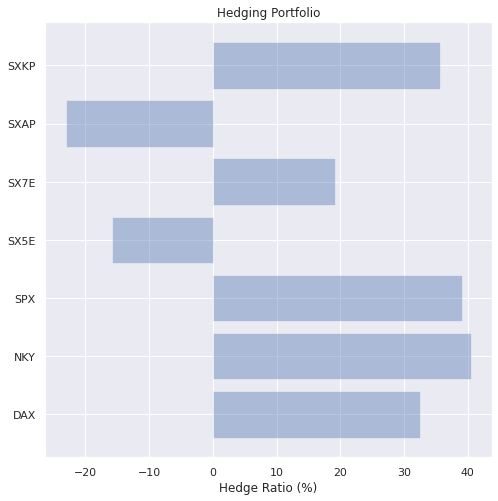

In [22]:

plt.figure(figsize=(8,8))
y_pos = np.arange(len(index_name))
hedge = ols_model.coef_
plt.barh(y=y_pos, width=hedge*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio');
